# EXTENSION PLAN

In [19]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
# load the additional datasets using pandas
df_clinical_care = pd.read_csv('Clinical Care.csv')
df_child_mortality = pd.read_csv('Health Outcomes_child_mortality.csv')
df_poor_fair_health = pd.read_csv('Health Outcomes_poor_fair_health.csv')

DATASET 1: Poor/Fair Health Percentage

This dataset encompasses the percentage of adults reporting poor/fair health in Lewis and Clark County, the location of Helena, Montana. It includes Confidence Interval values, specifying both lower and upper bounds for the reported percentages. The dataset also provides Geography ID information for Lewis and Clark County, which, for the purpose of our analysis, will be omitted. The relevant information comprises the percentage values of adults reporting poor/fair health for each year, along with the corresponding upper and lower bounds of the confidence intervals. The data consists of data points of each year from 2014 to 2022.

In [21]:
# drop columns that are not of use for us.
df_poor_fair_health = df_poor_fair_health.drop(columns = ['ID Year', 'ID Geography', 'Slug Geography'])
df_poor_fair_health

,Year,Poor Or Fair Health,Poor Or Fair Health CI Low,Poor Or Fair Health CI High,Geography
0,2022,0.133000,0.114000,0.155000,"Lewis and Clark County, MT"
1,2021,0.128335,0.109033,0.151905,"Lewis and Clark County, MT"
2,2020,0.125915,0.121225,0.130584,"Lewis and Clark County, MT"
3,2019,0.113737,0.109037,0.118531,"Lewis and Clark County, MT"
4,2018,0.113737,0.109037,0.118531,"Lewis and Clark County, MT"
5,2017,0.111000,0.107000,0.115000,"Lewis and Clark County, MT"
6,2016,0.120000,0.116000,0.125000,"Lewis and Clark County, MT"
7,2015,0.129000,0.107000,0.155000,"Lewis and Clark County, MT"
8,2014,0.129000,0.107000,0.155000,"Lewis and Clark County, MT"


DATASET 2: Under-18 Mortality Rate:

This dataset focuses on the number of deaths among residents under the age of 18 per 100,000 population in Lewis and Clark County. Similar to Dataset 1, it includes high and low confidence intervals. The Geography ID information is present but will not be utilized in the analysis. The essential data includes the mortality rate for residents under 18, along with the associated high and low confidence intervals. The data consists of data points of each year from 2014 to 2022.

In [22]:
# drop columns that are not of use for us.
df_child_mortality = df_child_mortality.drop(columns = ['ID Year', 'ID Geography', 'Slug Geography'])
df_child_mortality

,Year,Child Mortality,Child Mortality CI Low,Child Mortality CI High,Geography
0,2022,42.222599,27.324240,62.328884,"Lewis and Clark County, MT"
1,2021,42.569859,27.548967,62.841507,"Lewis and Clark County, MT"
2,2020,53.186012,36.137318,75.493301,"Lewis and Clark County, MT"
3,2019,55.320251,37.799999,78.099998,"Lewis and Clark County, MT"
4,2018,57.322517,39.500000,80.500000,"Lewis and Clark County, MT"
5,2017,55.799999,38.200001,78.800003,"Lewis and Clark County, MT"
6,2016,52.299999,35.299999,74.599998,"Lewis and Clark County, MT"
7,2015,52.200001,35.200001,74.599998,"Lewis and Clark County, MT"
8,2014,49.200001,32.700001,71.000000,"Lewis and Clark County, MT"


DATASET 3: Population-to-Provider Ratio

This dataset provides the ratio of the population to the number of primary care providers other than physicians in Lewis and Clark County. Similar to the preceding datasets, it includes Geography ID information, which will be disregarded in our analysis. The pertinent data consists of the population-to-provider ratio for each year from 2014 to 2022.

In [23]:
# drop columns that are not of use for us.
df_clinical_care = df_clinical_care.drop(columns = ['ID Year', 'ID Geography', 'Slug Geography'])
df_clinical_care

,Year,Other Primary Care Providers,Geography
0,2022,663,"Lewis and Clark County, MT"
1,2021,723,"Lewis and Clark County, MT"
2,2020,763,"Lewis and Clark County, MT"
3,2019,807,"Lewis and Clark County, MT"
4,2018,961,"Lewis and Clark County, MT"
5,2017,1089,"Lewis and Clark County, MT"
6,2016,1062,"Lewis and Clark County, MT"
7,2015,1127,"Lewis and Clark County, MT"
8,2014,1138,"Lewis and Clark County, MT"


The smoke estimates as calculated using the code from Calculate_AQI_estimate.ipynb. It can also be retrieved from the annual_smoke_impact_final.json JSON file in the repository. I have just maunally added it below.

In [24]:
# the smoke estimates in a dictionary
smoke_estimates = {'1963': 0.007746466322349359,
 '1964': 0.004715837418752645,
 '1965': 0.004851681933679964,
 '1966': 0.016419431918595215,
 '1967': 0.013076970829510039,
 '1968': 0.00812175076367962,
 '1969': 0.007104625131954668,
 '1970': 0.008692553437374885,
 '1971': 0.014559049849759484,
 '1972': 0.00473058267449343,
 '1973': 0.015396973449192131,
 '1974': 0.003728189388740233,
 '1975': 0.0035410795857873777,
 '1976': 0.005099892406687633,
 '1977': 0.0030637678620890865,
 '1978': 0.004593854753387357,
 '1979': 0.015276490382965578,
 '1980': 0.0036952395106999714,
 '1981': 0.016613415625182586,
 '1982': 0.0039673228585688555,
 '1983': 0.0081855618144019,
 '1984': 0.18584395325387132,
 '1985': 0.01775264796525581,
 '1986': 0.01125835389265813,
 '1987': 0.0070273460717218015,
 '1988': 0.4367106608341205,
 '1989': 0.008508347548104105,
 '1990': 0.025686032177121065,
 '1991': 0.013491241575790841,
 '1992': 0.01380545075937515,
 '1993': 0.002428902562245062,
 '1994': 0.023795581460602438,
 '1995': 0.007294178535393309,
 '1996': 0.0275475936754805,
 '1997': 0.003168790119940848,
 '1998': 0.00975577195773394,
 '1999': 0.01656554733571376,
 '2000': 0.19612266992988514,
 '2001': 0.015606649753452733,
 '2002': 0.017138375803046706,
 '2003': 0.05035726603856959,
 '2004': 0.004387887247880926,
 '2005': 0.017023796483546697,
 '2006': 0.028415181318095246,
 '2007': 0.08014703356497514,
 '2008': 0.010484536822144236,
 '2009': 0.010885439096311591,
 '2010': 0.01072651096540096,
 '2011': 0.010642435653140896,
 '2012': 0.08155310546576912,
 '2013': 0.016717476592153724,
 '2014': 0.008573923235072382,
 '2015': 0.02699825704016339,
 '2016': 0.017879308831702672,
 '2017': 0.05079923091066368,
 '2018': 0.01446583057204668,
 '2019': 0.019421988458384346,
 '2020': 0.025924254210324668}

# convert the data to a list
smoke_data = list(smoke_estimates.items())
df_smoke = pd.DataFrame(smoke_data, columns=['Year', 'smoke_estimate']) # convert the data to a dataframe

# Convert 'Year' to a datetime type if needed
df_smoke['Year'] = df_smoke['Year'].astype(int)

Plotting the graph of the number of patients seen/number of primary care providers over the years

Text(0.5, 1.0, 'Primary Care Providers Over Years')

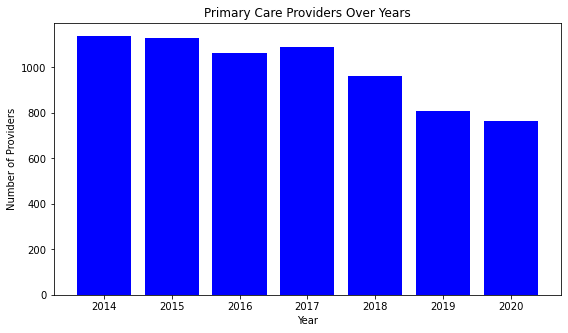

In [25]:
# Merging the datasets on 'Year'
merged_df_1 = pd.merge(df_clinical_care, df_smoke, on='Year', how='inner')
merged_df_2 = pd.merge(merged_df_1, df_child_mortality, on = 'Year', how = 'inner')
merged_df = pd.merge(merged_df_2, df_poor_fair_health, on = 'Year', how = 'inner')

# Plotting
plt.figure(figsize=(20, 5))

# Primary care providers plot
plt.subplot(1, 2, 1)
plt.bar(merged_df['Year'], merged_df['Other Primary Care Providers'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Providers')
plt.title('Primary Care Providers Over Years')

Plotting the percentage of people with poor or fair health over the years

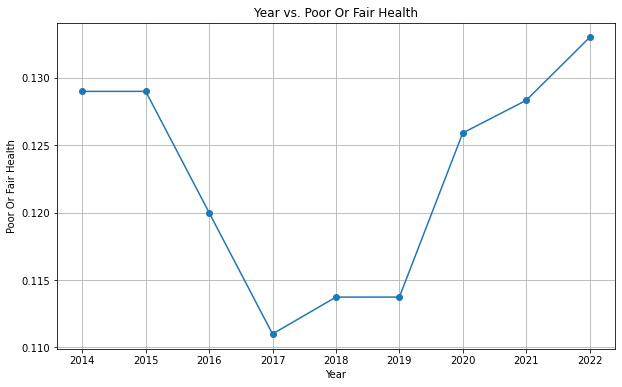

In [35]:
import matplotlib.pyplot as plt

# Data
years = np.array(df_poor_fair_health['Year'])
poor_health_values = np.array(df_poor_fair_health['Poor Or Fair Health'])

# Create a connected line graph
plt.figure(figsize=(10, 6))
plt.plot(years, poor_health_values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Poor Or Fair Health')
plt.title('Year vs. Poor Or Fair Health')

# Show the graph
plt.grid(True)
plt.show()

In [27]:
# drop columns that are not of use to us.
merged_df = merged_df.drop(columns = ['Geography_x', 'Geography_y'])
merged_df

,Year,Other Primary Care Providers,smoke_estimate,Child Mortality,Child Mortality CI Low,Child Mortality CI High,Poor Or Fair Health,Poor Or Fair Health CI Low,Poor Or Fair Health CI High,Geography
0,2020,763,0.025924,53.186012,36.137318,75.493301,0.125915,0.121225,0.130584,"Lewis and Clark County, MT"
1,2019,807,0.019422,55.320251,37.799999,78.099998,0.113737,0.109037,0.118531,"Lewis and Clark County, MT"
2,2018,961,0.014466,57.322517,39.500000,80.500000,0.113737,0.109037,0.118531,"Lewis and Clark County, MT"
3,2017,1089,0.050799,55.799999,38.200001,78.800003,0.111000,0.107000,0.115000,"Lewis and Clark County, MT"
4,2016,1062,0.017879,52.299999,35.299999,74.599998,0.120000,0.116000,0.125000,"Lewis and Clark County, MT"
5,2015,1127,0.026998,52.200001,35.200001,74.599998,0.129000,0.107000,0.155000,"Lewis and Clark County, MT"
6,2014,1138,0.008574,49.200001,32.700001,71.000000,0.129000,0.107000,0.155000,"Lewis and Clark County, MT"


The final merged dataset for our analysis.

In [30]:
# drop columns that are not of use to us.
merged_df = merged_df.drop(columns = ['Geography', 'Year'])
merged_df

,Other Primary Care Providers,smoke_estimate,Child Mortality,Child Mortality CI Low,Child Mortality CI High,Poor Or Fair Health,Poor Or Fair Health CI Low,Poor Or Fair Health CI High
0,763,0.025924,53.186012,36.137318,75.493301,0.125915,0.121225,0.130584
1,807,0.019422,55.320251,37.799999,78.099998,0.113737,0.109037,0.118531
2,961,0.014466,57.322517,39.500000,80.500000,0.113737,0.109037,0.118531
3,1089,0.050799,55.799999,38.200001,78.800003,0.111000,0.107000,0.115000
4,1062,0.017879,52.299999,35.299999,74.599998,0.120000,0.116000,0.125000
5,1127,0.026998,52.200001,35.200001,74.599998,0.129000,0.107000,0.155000
6,1138,0.008574,49.200001,32.700001,71.000000,0.129000,0.107000,0.155000


Plot the correlation matrix/heatmap.

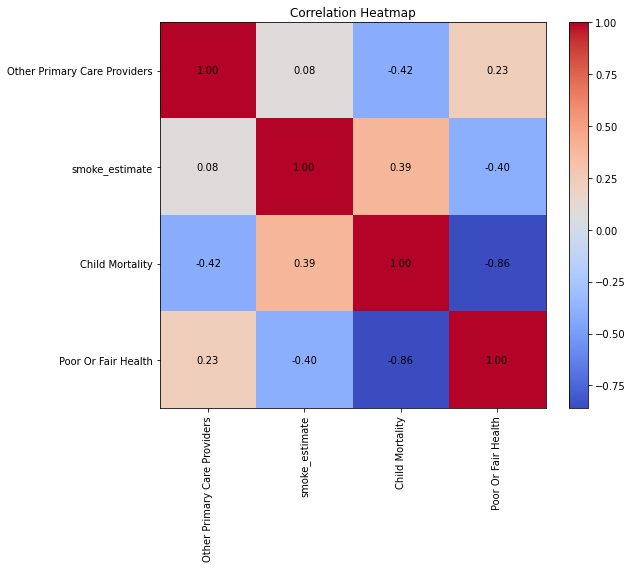

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# merged_df is our combined DataFrame
correlation_matrix = merged_df[['Other Primary Care Providers', 'smoke_estimate', 'Child Mortality', 'Poor Or Fair Health']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap, fraction=0.046, pad=0.04)  # Add a colorbar

# Add annotations to the cells
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

# Add titles and labels for clarity
plt.title('Correlation Heatmap')
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# Show the plot
plt.tight_layout()
plt.show()

Buliding a Rondom Forest Regression Model to predict the child mortality rate for the next 25 years based on the smoke impact estimate.

This below code is the model building process and the visualization is to get a quick visualization how well it is fitting the training data.

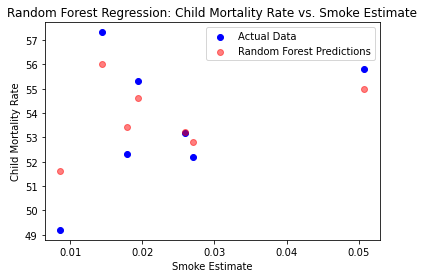

In [130]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your merged_df data
data = merged_df

# Select the features (smoke_estimate) and target (Child Mortality)
X = data[['smoke_estimate']]
y = data['Child Mortality']

# Initialize the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model to the data
model.fit(X, y)

# Make predictions using the model
predictions = model.predict(X)

# Visualize the results
plt.scatter(X, y, label='Actual Data', color='blue')
plt.scatter(X, predictions, label='Random Forest Predictions', color='red', alpha=0.5)
plt.xlabel('Smoke Estimate')
plt.ylabel('Child Mortality Rate')
plt.title('Random Forest Regression: Child Mortality Rate vs. Smoke Estimate')
plt.legend()
plt.show()

Now predict for the next 25 years.

In [131]:
# Define the 'smoke_forecast' data
# this is the forecasted data from the prediction model built in Calculate_AQI_estimate.ipynb which can be found in the same
# repository
smoke_forecast = pd.Series({
    '2021-12-31': 0.024282,
    '2022-12-31': 0.021353,
    '2023-12-31': 0.024057,
    '2024-12-31': 0.159897,
    '2025-12-31': 0.024695,
    '2026-12-31': 0.029430,
    '2027-12-31': 0.038791,
    '2028-12-31': 0.024525,
    '2029-12-31': 0.033750,
    '2030-12-31': 0.030836,
    '2031-12-31': 0.040875,
    '2032-12-31': 0.065928,
    '2033-12-31': 0.029267,
    '2034-12-31': 0.026338,
    '2035-12-31': 0.029042,
    '2036-12-31': 0.164882,
    '2037-12-31': 0.029680,
    '2038-12-31': 0.034415,
    '2039-12-31': 0.043776,
    '2040-12-31': 0.029510,
    '2041-12-31': 0.038735,
    '2042-12-31': 0.035821,
    '2043-12-31': 0.045860,
    '2044-12-31': 0.070913,
    '2045-12-31': 0.034252
})

# Convert the index (date) of 'smoke_forecast' to a datetime format
smoke_forecast.index = pd.to_datetime(smoke_forecast.index)

# Predict Child Mortality Rate for each date in 'smoke_forecast'
predicted_child_mortality = model.predict(smoke_forecast.values.reshape(-1, 1))

# Create a new DataFrame to store the predictions
predictions_df = pd.DataFrame({
    'Date': smoke_forecast.index,
    'Predicted Child Mortality': predicted_child_mortality
})

# Print the predictions
print(predictions_df)

         Date  Predicted Child Mortality
0  2021-12-31                  53.208781
1  2022-12-31                  54.385892
2  2023-12-31                  53.208781
3  2024-12-31                  54.977593
4  2025-12-31                  53.208781
5  2026-12-31                  52.804516
6  2027-12-31                  53.393593
7  2028-12-31                  53.208781
8  2029-12-31                  52.789291
9  2030-12-31                  52.804516
10 2031-12-31                  54.977593
11 2032-12-31                  54.977593
12 2033-12-31                  52.804516
13 2034-12-31                  53.208781
14 2035-12-31                  52.804516
15 2036-12-31                  54.977593
16 2037-12-31                  52.804516
17 2038-12-31                  52.894291
18 2039-12-31                  54.977593
19 2040-12-31                  52.804516
20 2041-12-31                  53.393593
21 2042-12-31                  52.923076
22 2043-12-31                  54.977593
23 2044-12-31   

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Plot the forecast for the child mortality rate based on the smoke impact estimate for the next 25 years.

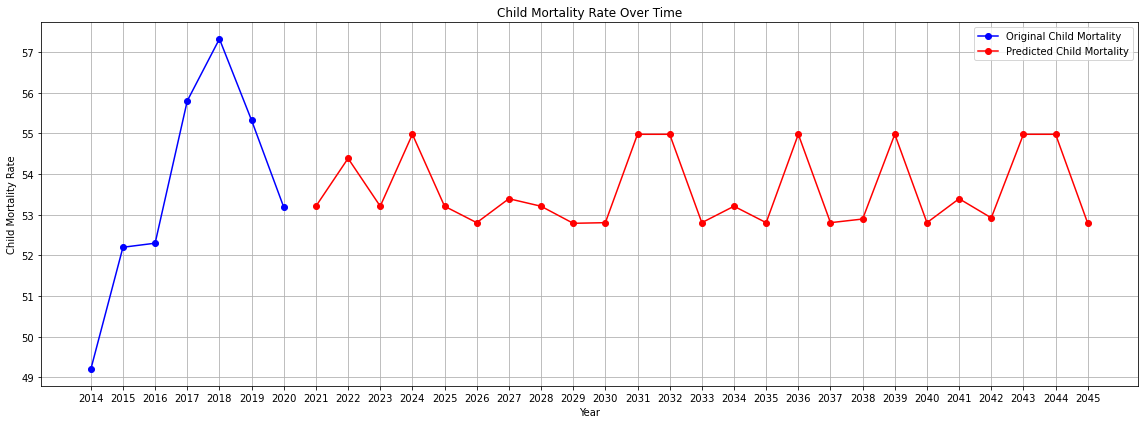

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Your merged_df and predictions_df data
# (Assuming the column names are as specified in your question)

# Convert the 'Year' column in merged_df to datetime
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')

# Convert the 'Date' column in predictions_df to datetime
predictions_df['Date'] = pd.to_datetime(predictions_df['Date'])

# Convert DataFrame columns to NumPy arrays
year_original = merged_df['Year'].dt.year.values
child_mortality_original = merged_df['Child Mortality'].values
date_predicted = predictions_df['Date'].dt.year.values
child_mortality_predicted = predictions_df['Predicted Child Mortality'].values

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the original child mortality rates in blue with markers
ax.plot(year_original, child_mortality_original, marker='o', linestyle='-', label='Original Child Mortality', color='blue')

# Plot the predicted child mortality rates in red with markers
ax.plot(date_predicted, child_mortality_predicted, marker='o', linestyle='-', label='Predicted Child Mortality', color='red')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Child Mortality Rate')
ax.set_title('Child Mortality Rate Over Time')

# Display all years on the x-axis
ax.set_xticks(np.unique(np.concatenate((year_original, date_predicted))))

# Add a legend
ax.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()